In [ ]:
import os
os.makedirs("results", exist_ok=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Thu thập và kiểm tra dữ liệu**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/K-Mean Clustering/data/Cust_Segmentation.csv')

print("Thông tin dữ liệu:")
df.info()

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
  print("Dữ liệu mẫu:")
  df.head()

Dữ liệu mẫu:


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
print("\nMô tả dữ liệu:")
df.describe()


Mô tả dữ liệu:


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [ ]:
# Kiểm tra giá trị bị thiếu
print(df.isnull().sum())

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


In [ ]:
print("\nPhân bố của cột Defaulted (Ban đầu):")
print(df['Defaulted'].value_counts(dropna=False))


Phân bố của cột Defaulted (Ban đầu):
Defaulted
0.0    517
1.0    183
NaN    150
Name: count, dtype: int64


In [ ]:
# Tính tỷ lệ của 0 và 1 trong các giá trị không bị thiếu
total_non_nan = df['Defaulted'].notna().sum()
ratio_0 = df['Defaulted'].value_counts().get(0, 0) / total_non_nan
ratio_1 = df['Defaulted'].value_counts().get(1, 0) / total_non_nan
print(f"Tỷ lệ 0: {ratio_0:.3f}, Tỷ lệ 1: {ratio_1:.3f}")

# Gán ngẫu nhiên giá trị 0 hoặc 1 cho các giá trị NaN dựa trên tỷ lệ
np.random.seed(42)
imputed_values = np.random.choice([0, 1], size=df['Defaulted'].isna().sum(), p=[ratio_0, ratio_1])
df.loc[df['Defaulted'].isna(), 'Defaulted'] = imputed_values

print("\nPhân bố của cột Defaulted sau khi điền giá trị bị thiếu:")
print(df['Defaulted'].value_counts())

Tỷ lệ 0: 0.740, Tỷ lệ 1: 0.260

Phân bố của cột Defaulted sau khi điền giá trị bị thiếu:
Defaulted
0.0    629
1.0    221
Name: count, dtype: int64


**Xử lý dữ liệu**

In [ ]:
data = df.select_dtypes(include=[np.number]).drop(columns=['Customer Id'])

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Số lượng dữ liệu sau khi loại ngoại lệ: {len(data)}")
print("\nMô tả dữ liệu sau khi loại ngoại lệ:")
data.describe()

Số lượng dữ liệu sau khi loại ngoại lệ: 672

Mô tả dữ liệu sau khi loại ngoại lệ:


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,33.958333,1.516369,7.433036,36.296131,0.967506,2.116283,0.236607,8.987798
std,7.639106,0.688223,5.698980,18.184436,0.854011,1.628882,0.425316,5.442445
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,28.000000,1.000000,3.000000,23.000000,0.319750,0.944750,0.000000,4.875000
50%,33.000000,1.000000,6.000000,31.000000,0.694000,1.649000,0.000000,7.900000
75%,39.000000,2.000000,11.000000,45.000000,1.371250,2.865250,0.000000,12.400000
max,56.000000,3.000000,25.000000,101.000000,4.160000,8.150000,1.000000,26.300000


In [ ]:
# Chuẩn hóa dữ liệu
def normalize(X):
    X_norm = (X - X.mean()) / X.std()
    return X_norm

X = normalize(data[['Age', 'Income', 'DebtIncomeRatio', 'Years Employed']])

print("\nDữ liệu sau khi chuẩn hóa:")
X.describe().style.format("{:.6f}")


Dữ liệu sau khi chuẩn hóa:


,Age,Income,DebtIncomeRatio,Years Employed
count,672.000000,672.000000,672.000000,672.000000
mean,-0.000000,0.000000,0.000000,-0.000000
std,1.000000,1.000000,1.000000,1.000000
min,-1.827221,-1.281103,-1.633052,-1.304275
25%,-0.779978,-0.731182,-0.755689,-0.777865
50%,-0.125451,-0.291245,-0.199873,-0.251455
75%,0.659981,0.478644,0.626961,0.625895
max,2.885373,3.558200,3.180960,3.082475


**Trực quan hoá dữ liệu**

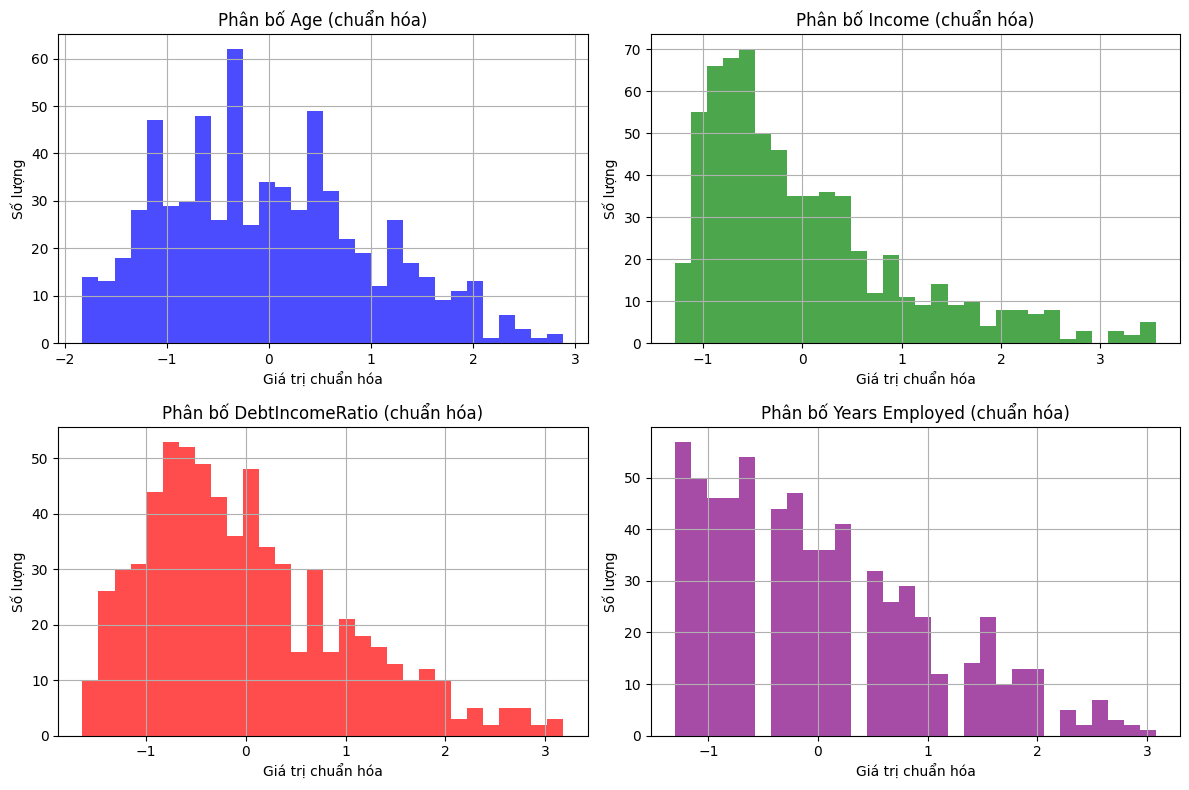

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(X['Age'], bins=30, color='blue', alpha=0.7)
plt.title('Phân bố Age (chuẩn hóa)')
plt.xlabel('Giá trị chuẩn hóa')
plt.ylabel('Số lượng')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(X['Income'], bins=30, color='green', alpha=0.7)
plt.title('Phân bố Income (chuẩn hóa)')
plt.xlabel('Giá trị chuẩn hóa')
plt.ylabel('Số lượng')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(X['DebtIncomeRatio'], bins=30, color='red', alpha=0.7)
plt.title('Phân bố DebtIncomeRatio (chuẩn hóa)')
plt.xlabel('Giá trị chuẩn hóa')
plt.ylabel('Số lượng')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(X['Years Employed'], bins=30, color='purple', alpha=0.7)
plt.title('Phân bố Years Employed (chuẩn hóa)')
plt.xlabel('Giá trị chuẩn hóa')
plt.ylabel('Số lượng')
plt.grid(True)

plt.tight_layout()
plt.savefig("results/phan_bo_dac_trung.png")
plt.show()

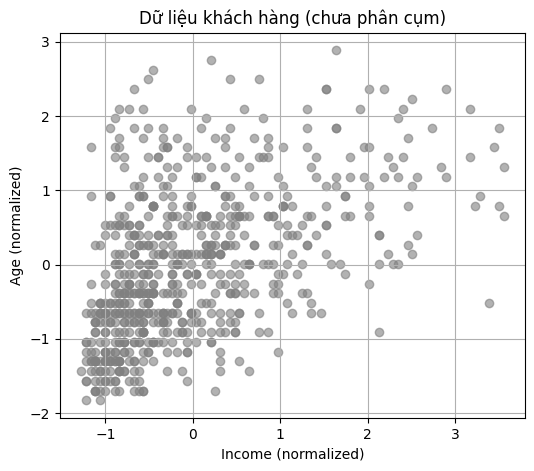

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X['Income'], X['Age'], alpha=0.6, c='gray')
plt.xlabel('Income (normalized)')
plt.ylabel('Age (normalized)')
plt.title('Dữ liệu khách hàng (chưa phân cụm)')
plt.grid(True)
plt.savefig("results/du_lieu_ban_dau.png")
plt.show()

**Phân cụm**

In [ ]:
# Hàm tính khoảng cách Euclidean
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Khởi tạo centroid bằng K-means++
def init_centroids_kmeans(X, k):
    X_np = X.to_numpy()
    centroids = [X_np[np.random.randint(len(X_np))]]
    for _ in range(1, k):
        distances = np.array([min([euclidean(x, c) for c in centroids]) for x in X_np])
        probs = distances / distances.sum()
        cumprobs = probs.cumsum()
        r = np.random.random()
        for j, p in enumerate(cumprobs):
            if r < p:
                centroids.append(X_np[j])
                break
    return np.array(centroids)

# Gán điểm dữ liệu vào cụm gần nhất
def assign_clusters(X, centroids):
    clusters = []
    for x in X.to_numpy():
        distances = [euclidean(x, c) for c in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

# Cập nhật centroid mới
def update_centroids(X, clusters, k):
    new_centroids = []
    X_np = X.to_numpy()
    for i in range(k):
        points = X_np[np.array(clusters) == i]
        if len(points) == 0:
            # Nếu cụm rỗng, chọn lại ngẫu nhiên
            new_centroids.append(X_np[np.random.randint(len(X_np))])
        else:
            new_centroids.append(np.mean(points, axis=0))
    return new_centroids

# Hàm K-means chính
def kmeans(X, k, max_iter=100, tol=1e-4):
    centroids = init_centroids_kmeans(X, k)
    for i in range(max_iter):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        shifts = [euclidean(a, b) for a, b in zip(centroids, new_centroids)]
        if max(shifts) < tol:
            print(f"Hội tụ sau {i+1} vòng lặp")
            break
        centroids = new_centroids
    return clusters, centroids

In [ ]:
k = 4
clusters, centroids = kmeans(X, k)

X['Cluster'] = clusters
print("\nSố điểm trong từng cụm:")
print(X['Cluster'].value_counts())

Hội tụ sau 21 vòng lặp

Số điểm trong từng cụm:
Cluster
1    204
2    200
0    146
3    122
Name: count, dtype: int64


**Kết quả**

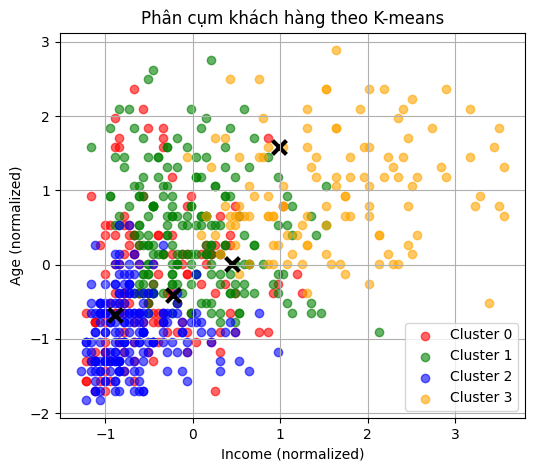

In [ ]:
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.figure(figsize=(6, 5))
for i in range(k):
    plt.scatter(X[X['Cluster'] == i]['Income'], X[X['Cluster'] == i]['Age'],
                label=f'Cluster {i}', alpha=0.6, color=colors[i])

# Vẽ centroid
for c in centroids:
    plt.scatter(c[0], c[1], marker='x', color='black', s=100, linewidths=3)

plt.xlabel("Income (normalized)")
plt.ylabel("Age (normalized)")
plt.title("Phân cụm khách hàng theo K-means")
plt.legend()
plt.grid(True)
plt.savefig("results/kmeans_result.png")
plt.show()

In [ ]:
# Gộp với dữ liệu gốc để phân tích
result = df.loc[data.index].copy()
result['Cluster'] = clusters

# Thống kê trung bình từng cụm
print("\nTrung bình các chỉ số trong từng cụm:")
result.groupby('Cluster').mean(numeric_only=True)


Trung bình các chỉ số trong từng cụm:


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,435.157534,32.212329,1.527397,4.924658,28.842466,1.516829,3.352438,0.465753,16.985616
1,442.838235,37.426471,1.475490,8.088235,36.470588,0.751402,1.572275,0.137255,6.425000
2,433.165000,27.120000,1.535000,3.515000,24.030000,0.492115,1.098665,0.265000,6.669500
3,385.131148,41.459016,1.540984,15.762295,65.032787,1.450803,3.214828,0.081967,7.502459


In [25]:
from google.colab import files

!zip -r results.zip results/
files.download("results.zip")

updating: results/ (stored 0%)
updating: results/phan_bo_dac_trung.png (deflated 20%)
updating: results/du_lieu_ban_dau.png (deflated 8%)
updating: results/kmeans_result.png (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>